# Predictive Model using Linear Regression 

# Description:
### More often than not, resources are scarce for businesses. It is essential to have the meaningful information to make the right decision and craft an effective strategy. Having a deeper understanding of the data can benefit businesses to for informed decision-making. In this dataset "ecommerce customers", the business question to be answered is whether more resources to be invested on their website or online app. The machine learning linear regression model will be used to answer the busines question.  

# Project Objective:
### To determine if investing in website or online app have more positive impact to the business' profitability. The target feature or y-variable is "Yearly Amount Spent".

# Process:
### This interesting project will start off with basic descriptive analysis, followed by detailed exploratory data analysis, data visualization of the features, data cleansing, and scaling the data to prepare for machine learning model from sklearn library. The model will be visualized and evaluated using metrics, such as MAE, MSE, and RMSE. The project will be concluded with an answer to the business question. 

# Positive Impact:
### The business will gain actionable insights to their question, if investing more in the website or app will have significant financial impact. Having a deeper understanding of the data using advanced data analysis can help businesses make the best available decision and deploy an effective business strategies. 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../input/ecommerce-customers/Ecommerce Customers")

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Noted that the dataset comes with a mixture of data type, such as object and float. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Running a basic descriptive analysis on the dataset as the first glimpse before diving in.

In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis
### A quick way to visualize the correlation between features. Noted that the feature "length of membership" and "Yearly Amount Spent" have high correlation.

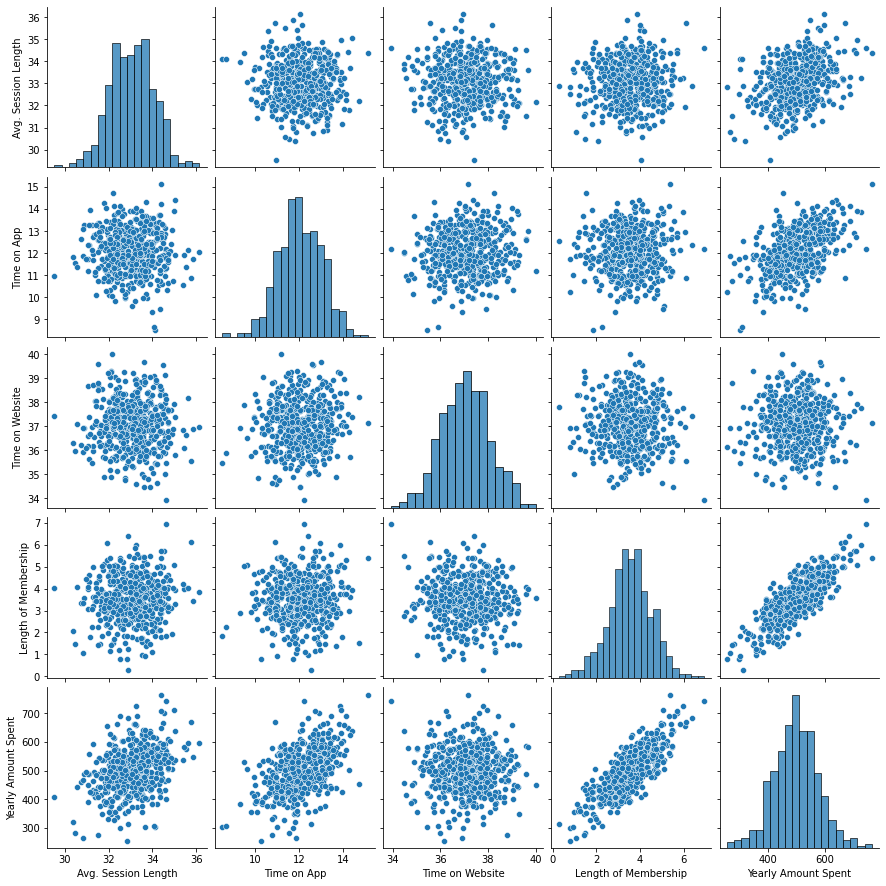

In [6]:
sns.pairplot(data)

In [7]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

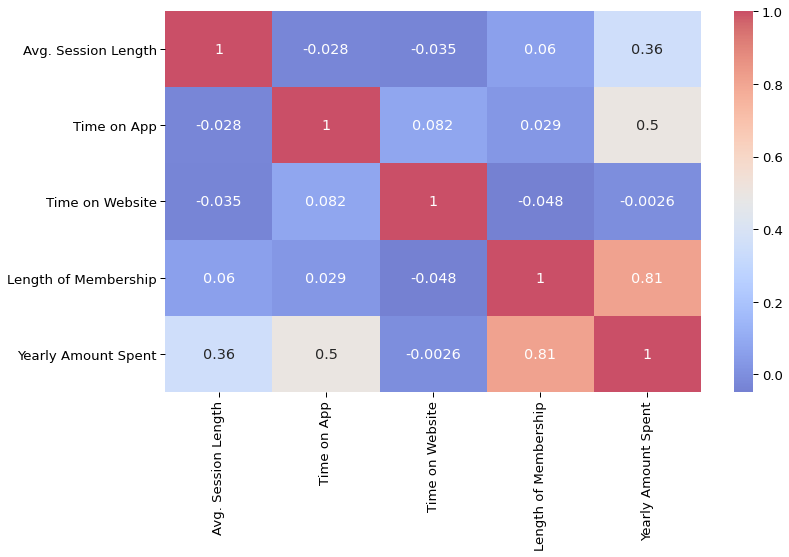

In [8]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, alpha=0.7)

### Diving into the features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length of Membership'>

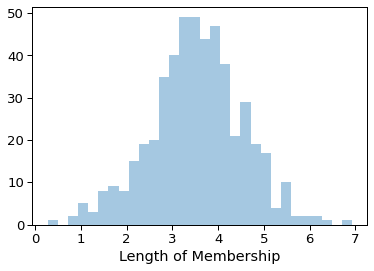

In [9]:
sns.distplot(data["Length of Membership"], bins=30, kde=False)

In [10]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

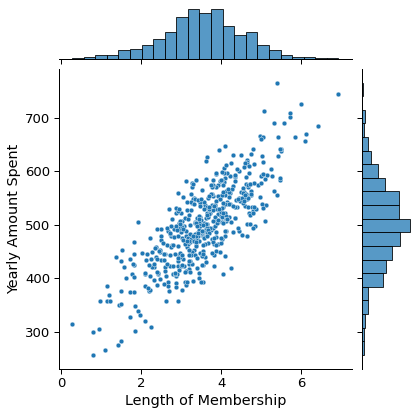

In [11]:
sns.jointplot(x="Length of Membership",y="Yearly Amount Spent", data=data, palette="coolwarm")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Noted that the email, address, and avatar are customer-specific and do not contribute much to the machine learning later. Will drop these features. 

In [13]:
data = data.drop(data.columns[[0,1,2]], axis=1)

In [14]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### The data features are in numeric data type and is ready for machine learning.

### Importing the model from sklearn library

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lmodel = LinearRegression()

### Will need to scale the data before training and testing using the model. 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
from sklearn.model_selection import train_test_split

### The variables X and y is created. The y-variable "Yearly Amount Spent" is our target feature, is what the model will be predicting on.

In [20]:
X = data.drop("Yearly Amount Spent", axis=1)

In [21]:
y = data["Yearly Amount Spent"]

### The test size is set at 30% as usual. The random state will be set at 42, which is arbitrary, to ensure the random test will be the same each time. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### The data is scaled. Noted that the fit_transform is not used on X_test to prevent leakage.

In [23]:
scaled = scaler.fit_transform(X_train, y_train)

In [24]:
scaled_test = scaler.transform(X_test)

### Fitting the data into the model. 

In [25]:
lm = lmodel.fit(X_train, y_train)

In [26]:
prediction = lmodel.predict(X_test)

### The model's prediction power is visualized in the scatterplot below. It has an apparent linear relation with very little noise. 

<AxesSubplot:xlabel='Yearly Amount Spent'>

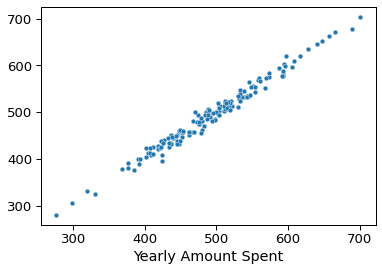

In [27]:
sns.scatterplot(x=y_test, y=prediction)

### It is time to evaluate the model using the metrics from sklearn library. 

In [28]:
from sklearn import metrics

In [29]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))




MAE:  8.42609164143207
MSE:  103.9155413650327
RMSE:  10.193897260863123


In [30]:
metrics.explained_variance_score(y_test, prediction)

0.9812611651910702

### The residual is visualized using the distplot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual: Y_test - Prediction')

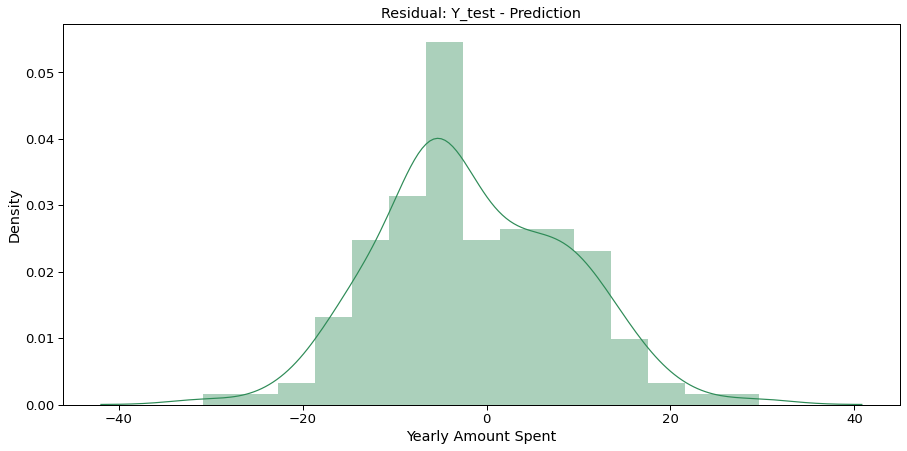

In [31]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=1.5)
sns.distplot(y_test-prediction, bins=15, color="seagreen")
plt.title("Residual: Y_test - Prediction")

### Creating the data for features' coefficients

In [32]:
model_coef = pd.DataFrame(lmodel.coef_, X.columns, columns=["Coefficient"])

In [33]:
model_coef

,Coefficient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


## Given other features are constant, the yearly amount spent will increase by $61 for every 1 unit of increase in length of membership.
## Given this information, the company should allocate more resources on their app to increase yearly amount spent. 